In [110]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# for regression modeling
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# for statistical analysis
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.regressionplots import plot_partregress_grid, plot_ccpr_grid

# ignore warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [111]:
# create sample data with multiple features
np.random.seed(42)
n_samples = 100
X1 = np.random.rand(n_samples) * 10
X2 = np.random.rand(n_samples) * 10
y = 2 * X1 + 0.5 * X2 + 1 + np.random.randn(n_samples) * 2

In [112]:
# create dataframe
df = pd.DataFrame({
    'X1': X1,
    'X2': X2,
    'y': y
})

In [113]:
# initialize and fit model
X = df[['X1', 'X2']]
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [114]:
# Print the coefficients
print(f"Intercept: {model.intercept_:.4f}")
print(f"Coefficient X1: {model.coef_[0]:.4f}")
print(f"Coefficient X2: {model.coef_[1]:.4f}")

Intercept: 0.8212
Coefficient X1: 1.9317
Coefficient X2: 0.6439


In [115]:
model_sm = sm.OLS(y, sm.add_constant(X)).fit()

In [116]:
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     455.0
Date:                Mon, 14 Apr 2025   Prob (F-statistic):           5.15e-50
Time:                        04:24:32   Log-Likelihood:                -208.42
No. Observations:                 100   AIC:                             422.8
Df Residuals:                      97   BIC:                             430.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8212      0.508      1.615      0.1

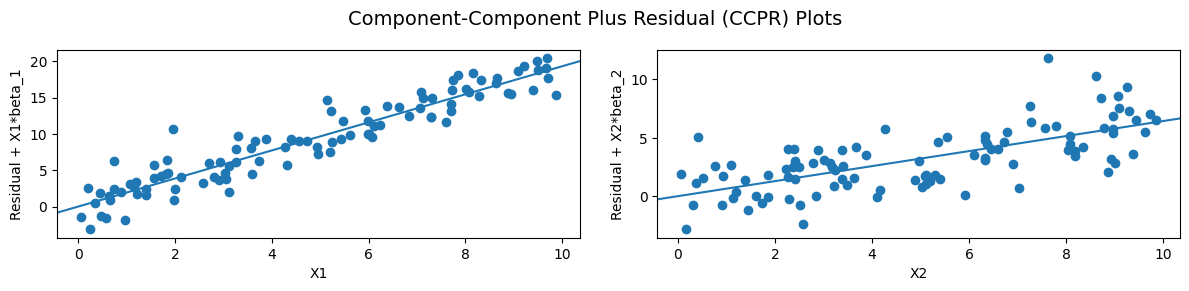

In [117]:
# Component-Component Plus Residual (CCPR) Plots
fig = plt.figure(figsize=(12, 5))
plot_ccpr_grid(model_sm, fig=fig)
plt.suptitle('Component-Component Plus Residual (CCPR) Plots', fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

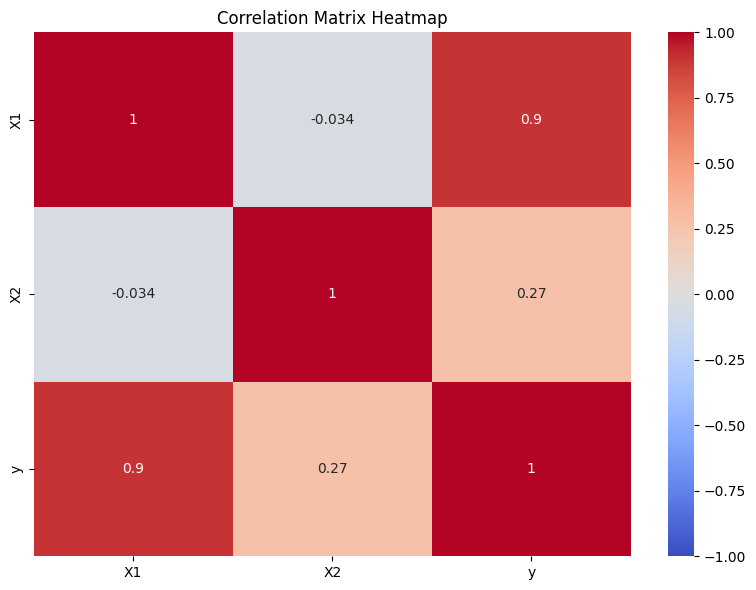

In [118]:
# Heatmap of Correlation Matrix
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

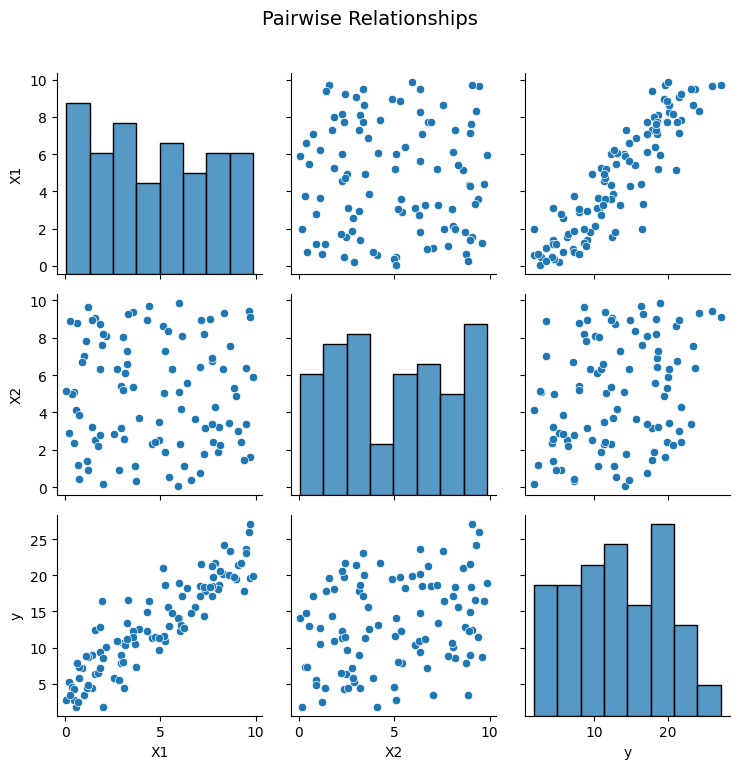

In [119]:
# Pairplot for Multiple Variables
sns.pairplot(df, height=2.5)
plt.suptitle('Pairwise Relationships', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

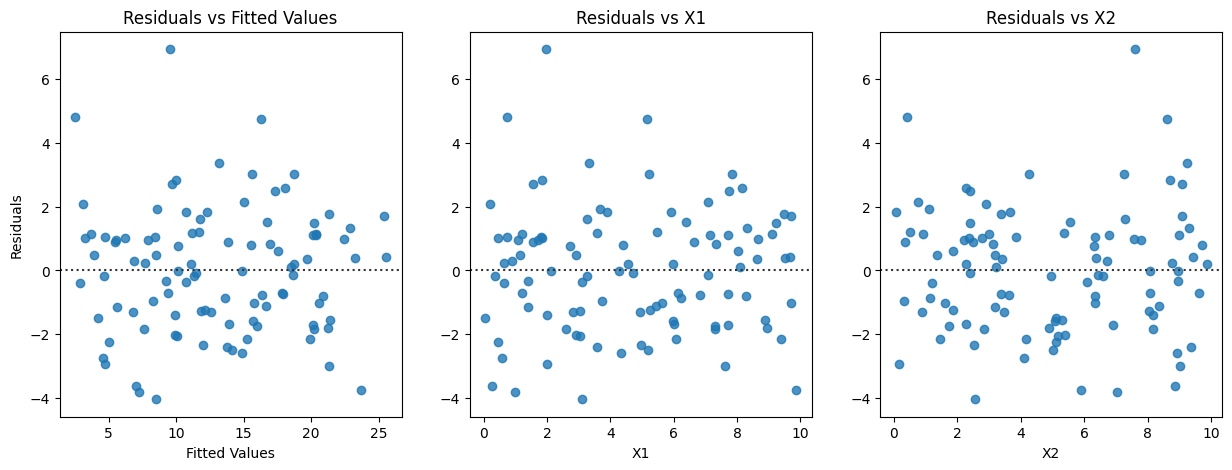

In [120]:
y_pred = model.predict(X)
residuals = y - y_pred

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.residplot(x=y_pred, y=residuals, ax=ax[0], label="Fitted Values")
ax[0].set_title("Residuals vs Fitted Values")
ax[0].set_xlabel("Fitted Values")
ax[0].set_ylabel("Residuals")

sns.residplot(x=X1, y=residuals, ax=ax[1], label="X1")
ax[1].set_title("Residuals vs X1")
ax[1].set_xlabel("X1")
# ax[1].get_yaxis().set_visible(False)

sns.residplot(x=X2, y=residuals, ax=ax[2], label="X2")
ax[2].set_title("Residuals vs X2")
ax[2].set_xlabel("X2")
# ax[2].get_yaxis().set_visible(False)

plt.show()

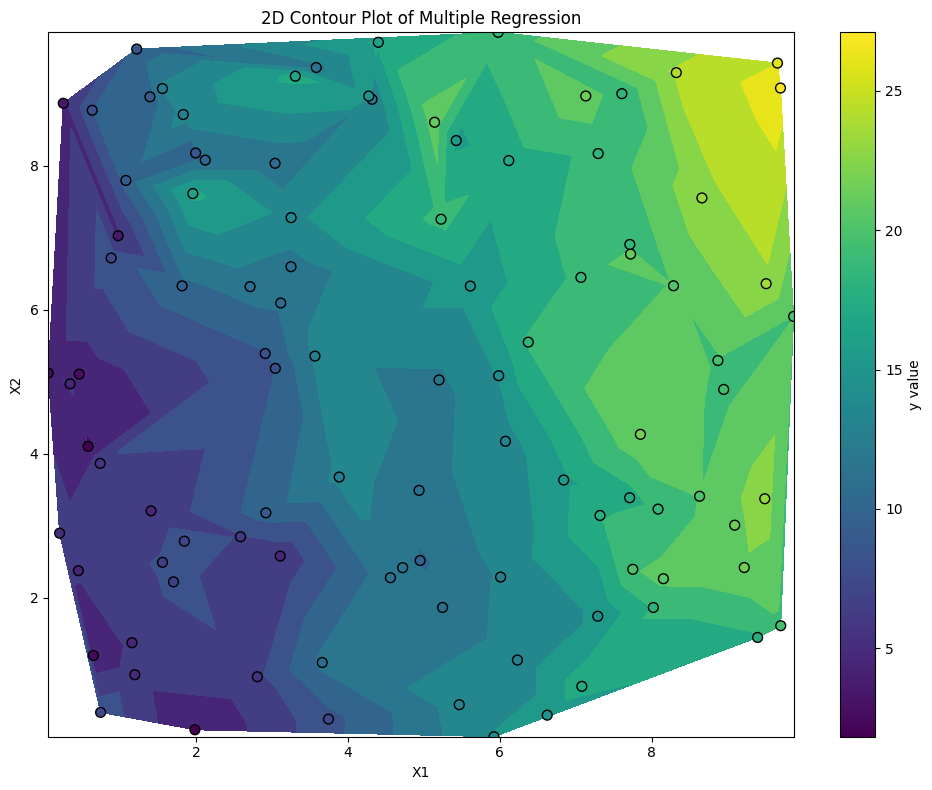

In [ ]:
# 2D Contour Plot with Color Gradient for Third Variable
plt.figure(figsize=(10, 8))
contour = plt.tricontourf(X1, X2, y, cmap='viridis', levels=15)
plt.scatter(X1, X2, c=y, cmap='viridis', edgecolor='k', s=50)
plt.colorbar(label='y value')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('2D Contour Plot of Multiple Regression')
plt.tight_layout()
plt.show()